In [2]:
import pandas as pd
import numpy as np

In [3]:
### Problem definition - Predicting whether the patient has heart disease

In [4]:
target="Is healthy"

In [5]:
data=pd.read_csv("/Users/brianshimmer/Desktop/Data science training/Data science training/Data science training/Heart disease dataset/heart disease.csv")

In [6]:
data

,Age,Sex,chest pain type,Trestbps,cholesteral,fasting blood sugar< 120,resting ecg,max heart rate,exercise induced angina,oldpeak,slope,Number of vessels colored,Thal,Is healthy,Type
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,male,notang,124.0,255.0,true,norm,175.0,fal,0.0,up,2.0,norm,buff,H
299,57.0,male,asympt,132.0,207.0,fal,norm,168.0,true,0.0,up,0.0,rev,buff,H
300,49.0,male,notang,118.0,149.0,fal,hyp,126.0,fal,0.8,up,3.0,norm,sick,S1
301,74.0,fem,abnang,120.0,269.0,fal,hyp,121.0,true,0.2,up,1.0,norm,buff,H


### Basic exploration

In [8]:
data.shape

(303, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        303 non-null    float64
 1   Sex                        303 non-null    object 
 2   chest pain type            303 non-null    object 
 3   Trestbps                   303 non-null    float64
 4   cholesteral                303 non-null    float64
 5   fasting blood sugar< 120   303 non-null    object 
 6   resting ecg                303 non-null    object 
 7   max heart rate             303 non-null    float64
 8   exercise induced angina    303 non-null    object 
 9   oldpeak                    303 non-null    float64
 10  slope                      303 non-null    object 
 11  Number of vessels colored  303 non-null    object 
 12  Thal                       303 non-null    object 
 13  Is healthy                 303 non-null    object 

In [10]:
data.describe()

,Age,Trestbps,cholesteral,max heart rate,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [11]:
# checking missing values

data.isnull().sum()

Age                          0
Sex                          0
chest pain type              0
Trestbps                     0
cholesteral                  0
fasting blood sugar< 120     0
resting ecg                  0
max heart rate               0
exercise induced angina      0
oldpeak                      0
slope                        0
Number of vessels colored    0
Thal                         0
Is healthy                   0
Type                         0
dtype: int64

In [12]:
(data=="?").sum()

Age                          0
Sex                          0
chest pain type              0
Trestbps                     0
cholesteral                  0
fasting blood sugar< 120     0
resting ecg                  0
max heart rate               0
exercise induced angina      0
oldpeak                      0
slope                        0
Number of vessels colored    0
Thal                         0
Is healthy                   0
Type                         0
dtype: int64

In [13]:
(data=="").sum()

Age                          0
Sex                          0
chest pain type              0
Trestbps                     0
cholesteral                  0
fasting blood sugar< 120     0
resting ecg                  0
max heart rate               0
exercise induced angina      0
oldpeak                      0
slope                        0
Number of vessels colored    0
Thal                         0
Is healthy                   0
Type                         0
dtype: int64

In [14]:
# Target variable distribution

target_count=data[target].value_counts()

Text(0.5, 0, 'Target')

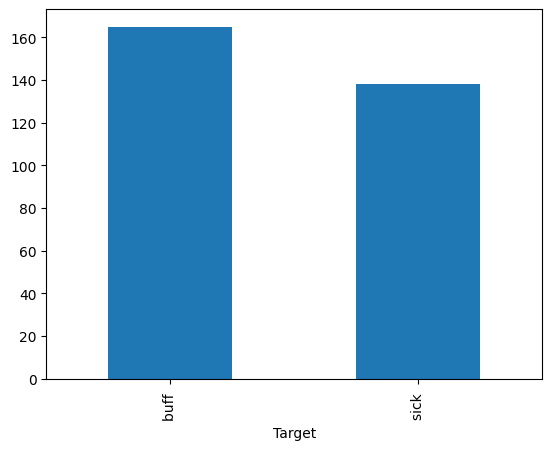

In [15]:
import matplotlib.pyplot as plt

target_count.plot(kind="bar")
plt.xlabel("Target")

### Data preprocessing

In [17]:
# Dropping irrelevant columns

#dropping type features because of its high correlation to is healthy column

data.drop("Type",axis=1, inplace=True)

In [18]:
#Converting categorical variables with binary division into binary features
num_cols=data.select_dtypes(include=["float64"]).columns
cat_cols=data.select_dtypes(include=["object"]).columns

binary_features=[col for col in cat_cols
                 if data[col].nunique()==2]
print(binary_features)

['Sex ', 'fasting blood sugar< 120', 'exercise induced angina', 'Is healthy']


In [19]:
data[binary_features]=data[binary_features].apply(
    lambda x:x.map({x.unique()[0]:0, x.unique()[1]:1}))

In [20]:
data

,Age,Sex,chest pain type,Trestbps,cholesteral,fasting blood sugar< 120,resting ecg,max heart rate,exercise induced angina,oldpeak,slope,Number of vessels colored,Thal,Is healthy
0,63.0,0,angina,145.0,233.0,0,hyp,150.0,0,2.3,down,0.0,fix,0
1,67.0,0,asympt,160.0,286.0,1,hyp,108.0,1,1.5,flat,3.0,norm,1
2,67.0,0,asympt,120.0,229.0,1,hyp,129.0,1,2.6,flat,2.0,rev,1
3,37.0,0,notang,130.0,250.0,1,norm,187.0,0,3.5,down,0.0,norm,0
4,41.0,1,abnang,130.0,204.0,1,hyp,172.0,0,1.4,up,0.0,norm,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,0,notang,124.0,255.0,0,norm,175.0,0,0.0,up,2.0,norm,0
299,57.0,0,asympt,132.0,207.0,1,norm,168.0,1,0.0,up,0.0,rev,0
300,49.0,0,notang,118.0,149.0,1,hyp,126.0,0,0.8,up,3.0,norm,1
301,74.0,1,abnang,120.0,269.0,1,hyp,121.0,1,0.2,up,1.0,norm,0


In [21]:
# Converting multi class categorical variables with one hot encoding

multi_class_features=list(
    set(cat_cols)-set(binary_features)
)

data=pd.get_dummies(data, columns=multi_class_features,drop_first=True)

In [22]:
data

,Age,Sex,Trestbps,cholesteral,fasting blood sugar< 120,max heart rate,exercise induced angina,oldpeak,Is healthy,Number of vessels colored_0.0,...,slope_down,slope_flat,chest pain type_angina,chest pain type_asympt,chest pain type_notang,Thal_ fix,Thal_ rev,Thal_norm,resting ecg_ hyp,resting ecg_norm
0,63.0,0,145.0,233.0,0,150.0,0,2.3,0,True,...,True,False,True,False,False,True,False,False,True,False
1,67.0,0,160.0,286.0,1,108.0,1,1.5,1,False,...,False,True,False,True,False,False,False,True,True,False
2,67.0,0,120.0,229.0,1,129.0,1,2.6,1,False,...,False,True,False,True,False,False,True,False,True,False
3,37.0,0,130.0,250.0,1,187.0,0,3.5,0,True,...,True,False,False,False,True,False,False,True,False,True
4,41.0,1,130.0,204.0,1,172.0,0,1.4,0,True,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,0,124.0,255.0,0,175.0,0,0.0,0,False,...,False,False,False,False,True,False,False,True,False,True
299,57.0,0,132.0,207.0,1,168.0,1,0.0,0,True,...,False,False,False,True,False,False,True,False,False,True
300,49.0,0,118.0,149.0,1,126.0,0,0.8,1,False,...,False,False,False,False,True,False,False,True,True,False
301,74.0,1,120.0,269.0,1,121.0,1,0.2,0,False,...,False,False,False,False,False,False,False,True,True,False


In [23]:
#Removing duplicates

data.drop_duplicates()

,Age,Sex,Trestbps,cholesteral,fasting blood sugar< 120,max heart rate,exercise induced angina,oldpeak,Is healthy,Number of vessels colored_0.0,...,slope_down,slope_flat,chest pain type_angina,chest pain type_asympt,chest pain type_notang,Thal_ fix,Thal_ rev,Thal_norm,resting ecg_ hyp,resting ecg_norm
0,63.0,0,145.0,233.0,0,150.0,0,2.3,0,True,...,True,False,True,False,False,True,False,False,True,False
1,67.0,0,160.0,286.0,1,108.0,1,1.5,1,False,...,False,True,False,True,False,False,False,True,True,False
2,67.0,0,120.0,229.0,1,129.0,1,2.6,1,False,...,False,True,False,True,False,False,True,False,True,False
3,37.0,0,130.0,250.0,1,187.0,0,3.5,0,True,...,True,False,False,False,True,False,False,True,False,True
4,41.0,1,130.0,204.0,1,172.0,0,1.4,0,True,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,0,124.0,255.0,0,175.0,0,0.0,0,False,...,False,False,False,False,True,False,False,True,False,True
299,57.0,0,132.0,207.0,1,168.0,1,0.0,0,True,...,False,False,False,True,False,False,True,False,False,True
300,49.0,0,118.0,149.0,1,126.0,0,0.8,1,False,...,False,False,False,False,True,False,False,True,True,False
301,74.0,1,120.0,269.0,1,121.0,1,0.2,0,False,...,False,False,False,False,False,False,False,True,True,False


In [24]:
#Checking correlation

data.corr()

,Age,Sex,Trestbps,cholesteral,fasting blood sugar< 120,max heart rate,exercise induced angina,oldpeak,Is healthy,Number of vessels colored_0.0,...,slope_down,slope_flat,chest pain type_angina,chest pain type_asympt,chest pain type_notang,Thal_ fix,Thal_ rev,Thal_norm,resting ecg_ hyp,resting ecg_norm
Age,1.000000,0.098447,0.279351,0.213678,-0.121308,-0.398522,0.096801,0.210013,0.225439,-0.350844,...,0.030536,0.177201,0.047516,0.138253,-0.059432,0.063758,0.110752,-0.135891,0.141398,-0.160654
Sex,0.098447,1.000000,0.056769,0.197912,0.045032,0.044020,-0.141664,-0.096093,-0.280937,0.122854,...,-0.046183,0.009157,-0.088043,-0.089621,0.116588,-0.141135,-0.321559,0.376365,-0.036539,0.011940
Trestbps,0.279351,0.056769,1.000000,0.123174,-0.177531,-0.046698,0.067616,0.193216,0.144931,-0.055011,...,0.122384,0.025207,0.151343,0.021447,-0.045107,0.076369,0.109573,-0.140712,0.133249,-0.146576
cholesteral,0.213678,0.197912,0.123174,1.000000,-0.013294,-0.009940,0.067023,0.053952,0.085239,-0.080600,...,-0.045340,0.051177,-0.050589,0.070684,-0.037918,-0.093560,0.059621,-0.004591,0.166565,-0.174394
fasting blood sugar< 120,-0.121308,0.045032,-0.177531,-0.013294,1.000000,0.008567,-0.025665,-0.005747,-0.028046,0.112548,...,-0.105284,0.033360,-0.055511,0.060190,-0.083679,-0.091351,-0.030953,0.086774,-0.077405,0.066344
max heart rate,-0.398522,0.044020,-0.046698,-0.009940,0.008567,1.000000,-0.378812,-0.344187,-0.421741,0.273136,...,-0.056590,-0.419627,0.079082,-0.376561,0.165475,-0.159748,-0.215417,0.294801,-0.073953,0.101512
exercise induced angina,0.096801,-0.141664,0.067616,0.067023,-0.025665,-0.378812,1.000000,0.288223,0.436757,-0.187734,...,0.059253,0.257687,-0.093384,0.469061,-0.271028,0.063073,0.300223,-0.328539,0.084059,-0.093776
oldpeak,0.210013,-0.096093,0.193216,0.053952,-0.005747,-0.344187,0.288223,1.000000,0.430696,-0.204803,...,0.394253,0.310986,0.086959,0.280243,-0.132444,0.104635,0.302145,-0.339086,0.100141,-0.138486
Is healthy,0.225439,-0.280937,0.144931,0.085239,-0.028046,-0.421741,0.436757,0.430696,1.000000,-0.465590,...,0.063554,0.362053,-0.086957,0.516015,-0.316742,0.106589,0.486112,-0.527334,0.159775,-0.175322
Number of vessels colored_0.0,-0.350844,0.122854,-0.055011,-0.080600,0.112548,0.273136,-0.187734,-0.204803,-0.465590,1.000000,...,0.075537,-0.158919,0.068522,-0.235437,0.099723,-0.067726,-0.227459,0.243328,-0.105628,0.109728


### EDA

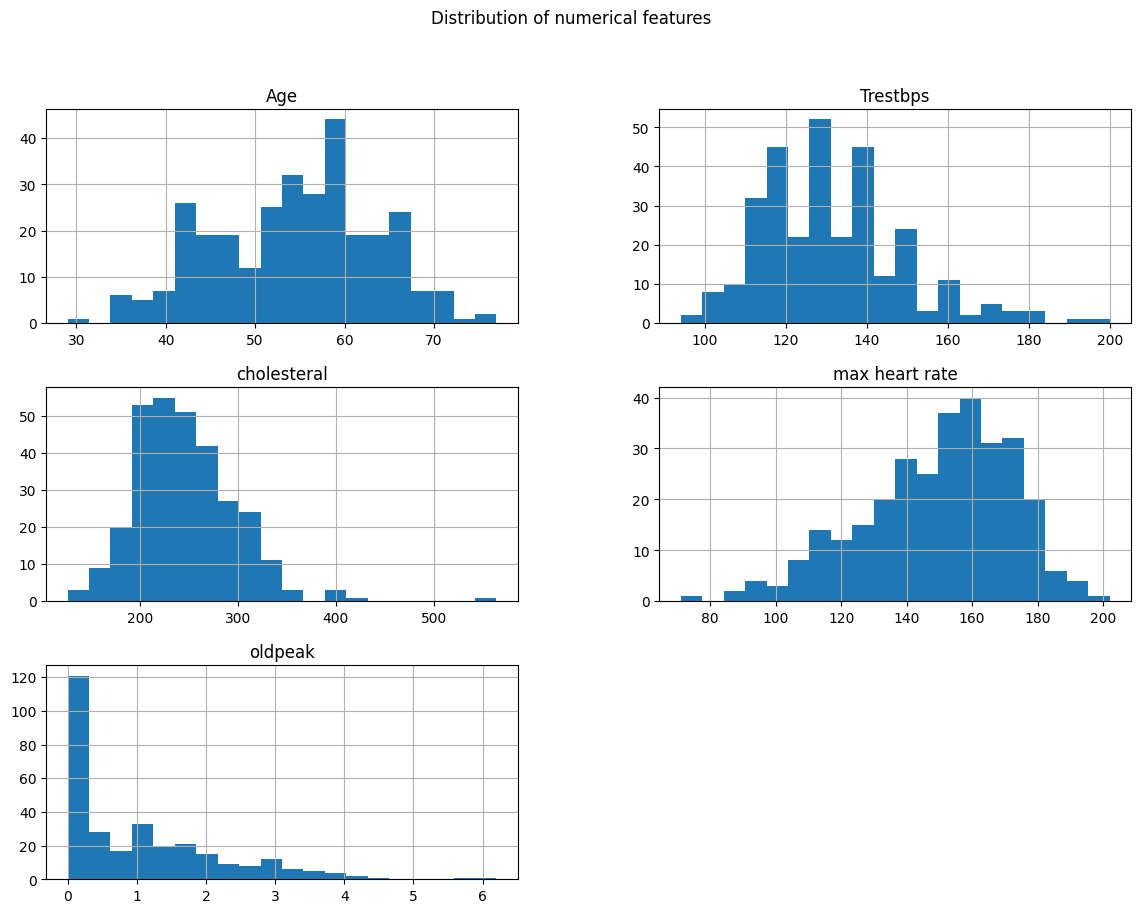

In [49]:
#Histogram for numerical features

data[num_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle("Distribution of numerical features")
plt.show()

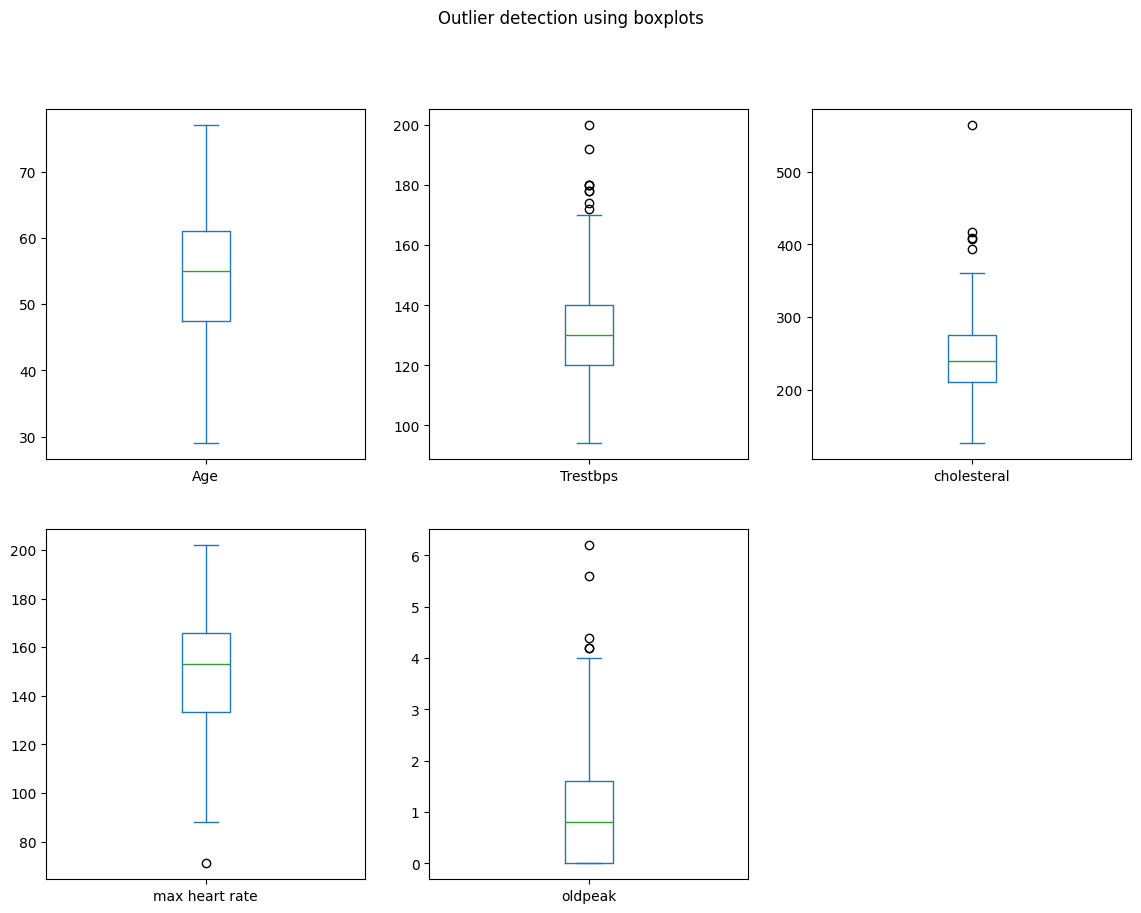

In [51]:
#Outlier detection using Boxplot

data[num_cols].plot(
    kind="box",
    subplots=True,
    layout=(len(num_cols)//3+1,3),
    figsize=(14, 10),
    sharex=False
)
plt.suptitle("Outlier detection using boxplots")
plt.show()

In [53]:
import seaborn as sns

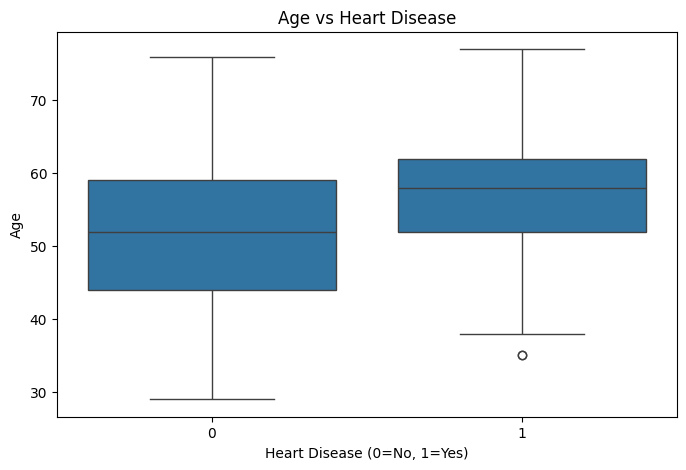

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(x=target, y="Age", data=data)
plt.title("Age vs Heart Disease")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()

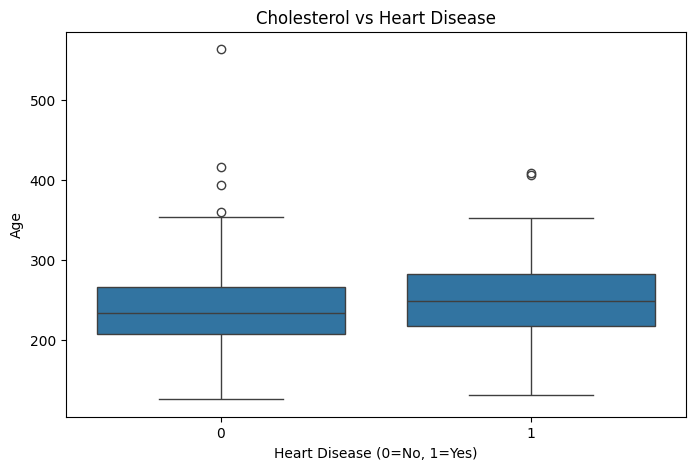

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(x=target, y="cholesteral", data=data)
plt.title("Cholesterol vs Heart Disease")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()

In [63]:
#Correlation Analysis

correlation_matrix=data[num_cols].corr()
correlation_matrix

,Age,Trestbps,cholesteral,max heart rate,oldpeak
Age,1.000000,0.279351,0.213678,-0.398522,0.210013
Trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
cholesteral,0.213678,0.123174,1.000000,-0.009940,0.053952
max heart rate,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


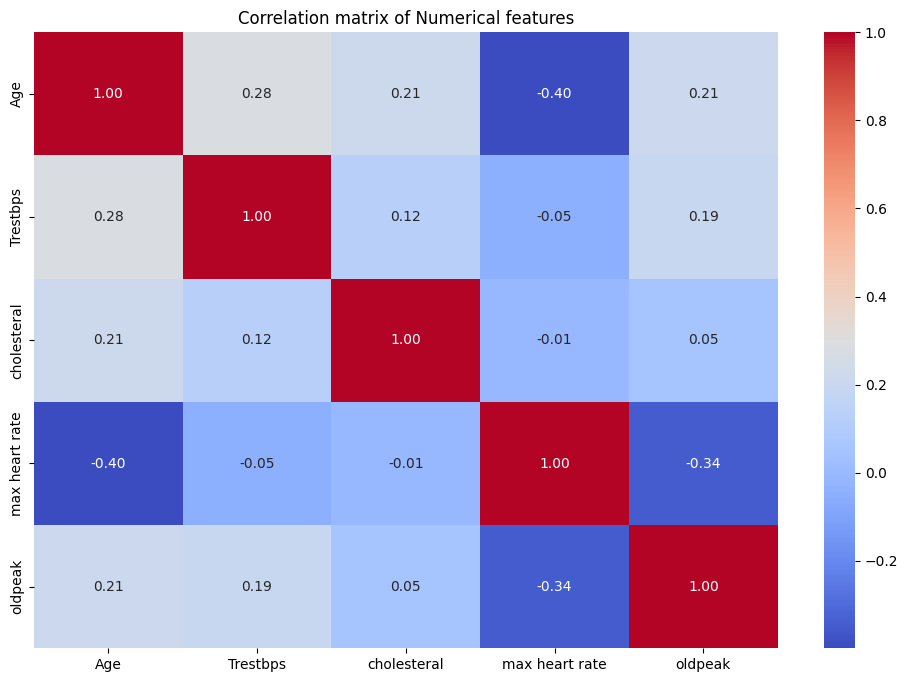

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix of Numerical features")
plt.show()

In [69]:
target_corr=data.corr()[target].sort_values(ascending=False)
target_corr

Is healthy                       1.000000
chest pain type_asympt           0.516015
Thal_ rev                        0.486112
exercise induced angina          0.436757
oldpeak                          0.430696
slope_flat                       0.362053
Number of vessels colored_2.0    0.273998
Number of vessels colored_1.0    0.232412
Age                              0.225439
Number of vessels colored_3.0    0.210615
resting ecg_ hyp                 0.159775
Trestbps                         0.144931
Thal_ fix                        0.106589
cholesteral                      0.085239
slope_down                       0.063554
fasting blood sugar< 120        -0.028046
chest pain type_angina          -0.086957
resting ecg_norm                -0.175322
Sex                             -0.280937
chest pain type_notang          -0.316742
max heart rate                  -0.421741
Number of vessels colored_0.0   -0.465590
Thal_norm                       -0.527334
Name: Is healthy, dtype: float64

In [71]:
#Grouping data for medical significance

data.groupby(target)[num_cols].mean()

,Age,Trestbps,cholesteral,max heart rate,oldpeak
Is healthy,,,,,
0,52.496970,129.303030,242.230303,158.466667,0.583030
1,56.601449,134.398551,251.086957,139.101449,1.585507


In [73]:
data.groupby(target)[num_cols].median()

,Age,Trestbps,cholesteral,max heart rate,oldpeak
Is healthy,,,,,
0,52.0,130.0,234.0,161.0,0.2
1,58.0,130.0,249.0,142.0,1.4


### Modelling and evaluation

In [76]:
#Separating data in X and y

X=data.drop(target, axis=1)
y=data[target]

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [82]:
X_train

,Age,Sex,Trestbps,cholesteral,fasting blood sugar< 120,max heart rate,exercise induced angina,oldpeak,Number of vessels colored_0.0,Number of vessels colored_1.0,...,slope_down,slope_flat,chest pain type_angina,chest pain type_asympt,chest pain type_notang,Thal_ fix,Thal_ rev,Thal_norm,resting ecg_ hyp,resting ecg_norm
51,50.0,0,140.0,233.0,1,163.0,0,0.6,False,True,...,False,True,False,False,True,False,True,False,False,True
212,41.0,1,126.0,306.0,1,163.0,0,0.0,True,False,...,False,False,False,False,False,False,False,True,False,True
175,57.0,0,150.0,126.0,0,173.0,0,0.2,False,True,...,False,False,False,False,True,False,True,False,False,True
114,43.0,1,122.0,213.0,1,165.0,0,0.2,True,False,...,False,True,False,False,True,False,False,True,False,True
178,45.0,0,142.0,309.0,1,147.0,1,0.0,False,False,...,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,57.0,0,110.0,335.0,1,143.0,1,3.0,False,True,...,False,True,False,True,False,False,True,False,False,True
214,61.0,0,134.0,234.0,1,145.0,0,2.6,False,False,...,False,True,True,False,False,False,False,True,False,True
136,51.0,0,140.0,299.0,1,173.0,1,1.6,True,False,...,False,False,False,True,False,False,True,False,False,True
137,58.0,0,125.0,300.0,1,171.0,0,0.0,False,False,...,False,False,False,True,False,False,True,False,True,False


In [ ]:
#scaling the data using Standard scaler

from sklearn.preprocessing import StandardScaler
scaler=